In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string

In [2]:
data = os.path.abspath(os.path.join('.','data', 'data.csv'))

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,Channel,AuthorID,Author,Date,Content,Attachments,Reactions
0,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,369700858742571008,mantisclone,03/29/2023 1:02 AM,gm 👋 :Water_Wave: :Oceancopy:,NaN,NaN
1,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,843831770062913568,white_rider_,03/29/2023 4:37 PM,Good morning to all the @🧑‍💻Builder 🌊,NaN,NaN
2,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,563434444321587202,Maki#4920,03/29/2023 4:37 PM,**@White Rider just advanced to level 4!**,https://cdn.discordapp.com/attachments/1088751...,powerup (1)
3,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,194817764236460034,robinlehmann,03/29/2023 4:40 PM,https://tenor.com/view/hello-there-baby-yoda-m...,NaN,babyyodasoup (1)
4,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,387401160656683034,birususama,03/29/2023 4:40 PM,Good morning everyone 😀,NaN,🌅 (1)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84754 entries, 0 to 84753
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Channel      84754 non-null  object
 1   AuthorID     84754 non-null  int64 
 2   Author       84754 non-null  object
 3   Date         84754 non-null  object
 4   Content      64609 non-null  object
 5   Attachments  1959 non-null   object
 6   Reactions    6073 non-null   object
dtypes: int64(1), object(6)
memory usage: 4.5+ MB


In [12]:
# Preprocess the text data
def preprocess_text(text):
    # Check if text is a string
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        
        # Remove emojis and other symbols
        text = re.sub(r'[^\w\s]', '', text)
        
        # Remove extra whitespaces
        text = ' '.join(text.split())
    
    return text

# Apply preprocessing to 'Content' column
df['Preprocessed_Content'] = df['Content'].apply(preprocess_text)
df.dropna(inplace=True)


In [17]:
# Define themes and associated keywords
themes_keywords = {
    'technical': ['smart contracts', 'technical skills', 'building applications', 'APIs'],
    'price-related': ['$OCEAN token', 'price', 'market trends', 'fluctuating'],
    'general information': ['development roadmap', 'governance decisions', 'educational resources', 'community-driven initiatives']
}

# Function to categorize questions into themes
def categorize_questions(question):
    for theme, keywords in themes_keywords.items():
        for keyword in keywords:
            if re.search(keyword, question, re.IGNORECASE):
                return theme
    return 'other'

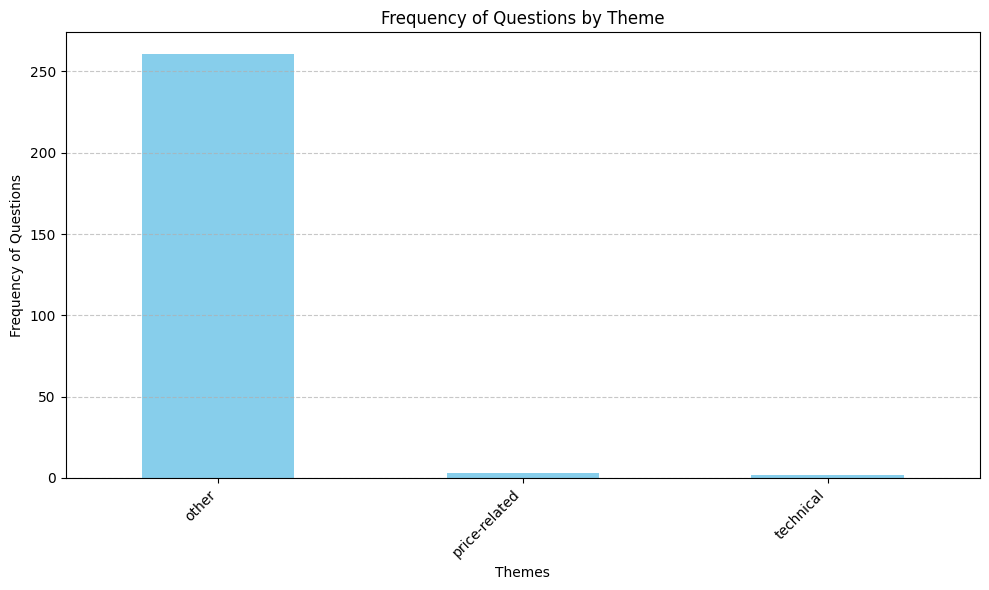

In [18]:
# Apply categorization to each question
df['Theme'] = df['Content'].apply(categorize_questions)

# Count the frequency of questions by theme
theme_counts = df['Theme'].value_counts()

# Create a bar chart for the frequency of questions by theme
plt.figure(figsize=(10, 6))
theme_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Themes')
plt.ylabel('Frequency of Questions')
plt.title('Frequency of Questions by Theme')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [22]:
theme_counts = df['Theme'].value_counts()
theme_counts

Theme
other            261
price-related      3
technical          2
Name: count, dtype: int64

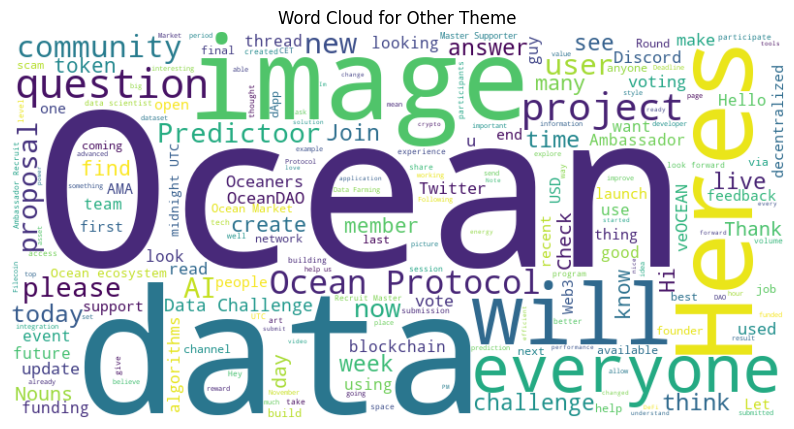

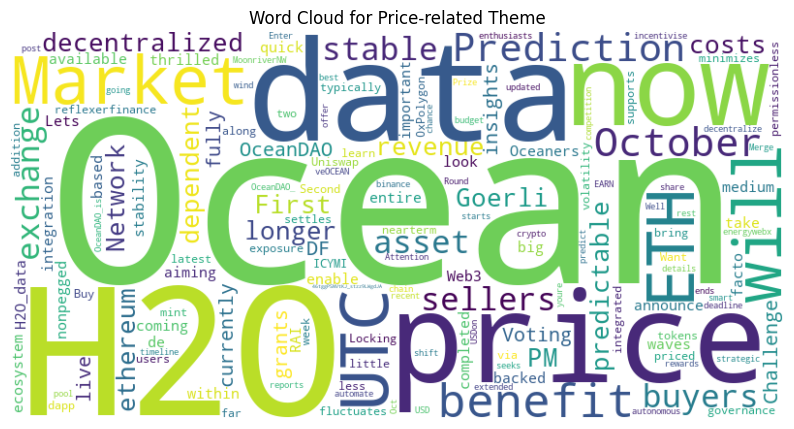

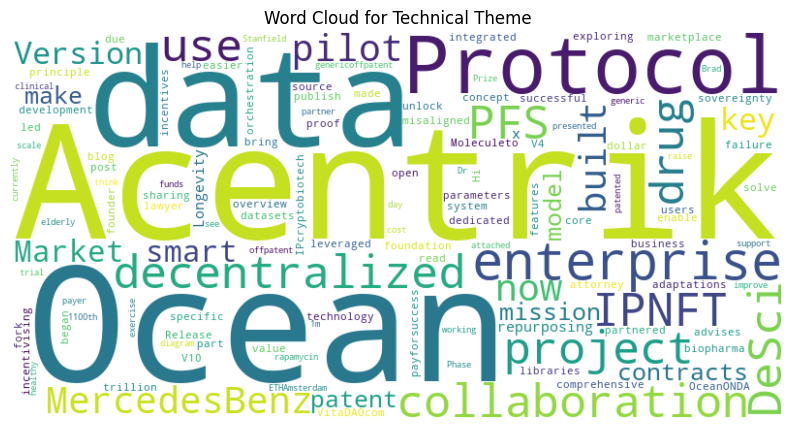

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for a given theme
def generate_wordcloud(theme):
    text = ' '.join(df[df['Theme'] == theme]['Preprocessed_Content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {theme.capitalize()} Theme')
    plt.axis('off')
    plt.show()

# Generate word clouds for each theme
for theme in theme_counts.index:
    generate_wordcloud(theme)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84754 entries, 0 to 84753
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               84754 non-null  object
 1   AuthorID              84754 non-null  int64 
 2   Author                84754 non-null  object
 3   Date                  84754 non-null  object
 4   Content               64609 non-null  object
 5   Attachments           1959 non-null   object
 6   Reactions             6073 non-null   object
 7   Preprocessed_Content  64609 non-null  object
dtypes: int64(1), object(7)
memory usage: 5.2+ MB


In [8]:
# Ensure all values in 'Preprocessed_Content' are strings
df['Preprocessed_Content'] = df['Preprocessed_Content'].astype(str)

# Initialize WordNet lemmatizer and Porter stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Tokenize the text into words
df['Tokenized_Content'] = df['Preprocessed_Content'].apply(lambda x: word_tokenize(x))

# Lemmatization
df['Lemmatized_Content'] = df['Tokenized_Content'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Stemming
df['Stemmed_Content'] = df['Tokenized_Content'].apply(lambda x: [stemmer.stem(word) for word in x])


In [9]:
df.head()

,Channel,AuthorID,Author,Date,Content,Attachments,Reactions,Preprocessed_Content,Tokenized_Content,Lemmatized_Content,Stemmed_Content
0,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,369700858742571008,mantisclone,03/29/2023 1:02 AM,gm 👋 :Water_Wave: :Oceancopy:,NaN,NaN,gm Water_Wave Oceancopy,"[gm, Water_Wave, Oceancopy]","[gm, Water_Wave, Oceancopy]","[gm, water_wav, oceancopi]"
1,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,843831770062913568,white_rider_,03/29/2023 4:37 PM,Good morning to all the @🧑‍💻Builder 🌊,NaN,NaN,Good morning to all the Builder,"[Good, morning, to, all, the, Builder]","[Good, morning, to, all, the, Builder]","[good, morn, to, all, the, builder]"
2,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,563434444321587202,Maki#4920,03/29/2023 4:37 PM,**@White Rider just advanced to level 4!**,https://cdn.discordapp.com/attachments/1088751...,powerup (1),White Rider just advanced to level 4,"[White, Rider, just, advanced, to, level, 4]","[White, Rider, just, advanced, to, level, 4]","[white, rider, just, advanc, to, level, 4]"
3,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,194817764236460034,robinlehmann,03/29/2023 4:40 PM,https://tenor.com/view/hello-there-baby-yoda-m...,NaN,babyyodasoup (1),,[],[],[]
4,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,387401160656683034,birususama,03/29/2023 4:40 PM,Good morning everyone 😀,NaN,🌅 (1),Good morning everyone,"[Good, morning, everyone]","[Good, morning, everyone]","[good, morn, everyon]"


In [11]:
# Create TfidfVectorizer object for TF-IDF matrix with limited vocabulary size
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Preprocessed_Content'])

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())


In [12]:
tfidf_df

,00,000,0000,000000,000100,001,0047,008,01,02,...,мinаprоtоcоl,пь,шпрот,人类,𝐀𝐈𝐑𝐃𝐑𝐎𝐏,𝐀𝐢𝐫𝐝𝐫𝐨𝐩,𝐅𝐈,𝐒𝐇𝐀𝐑𝐃𝐄𝐔𝐌,𝐙𝐞𝐭𝐚𝐂𝐡𝐚𝐢𝐧,𝐳𝐤𝐒𝐲𝐧𝐜
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84749,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Create CountVectorizer object for DTM
vectorizer = CountVectorizer(max_features=10000)  # Adjust max_features as needed
dtm_matrix = vectorizer.fit_transform(df['Preprocessed_Content'])

# Apply LDA

lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(dtm_matrix)


def extract_top_words(model, feature_names, n_top_words):
    top_words_list = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        top_words_list.append(top_words)
    return top_words_list

# Assuming you have already trained the LDA model and created the CountVectorizer object

# Get feature names from CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Extract top words for each theme category
n_top_words = 10  # Adjust the number of top words
top_words_list = extract_top_words(lda_model, feature_names, n_top_words)

# Print top words for each theme category
for idx, top_words in enumerate(top_words_list):
    print(f"Theme {idx + 1} Top Words: {', '.join(top_words)}")

        





Theme 1 Top Words: the, server, joined, to, you, for, protocol, technical, easy, ocean
Theme 2 Top Words: the, ocean, protocol, building, to, in, v3, learn, academy, welcome
Theme 3 Top Words: nan, hello, you, thanks, hi, good, everyone, here, it, me
Theme 4 Top Words: the, to, and, you, is, of, for, in, ocean, on
Theme 5 Top Words: v4, oceanonda, nft, data, the, of, in, heres, to, with


In [19]:
# Calculate theme frequencies
topic_assignments = lda_model.transform(dtm_matrix)
theme_counts = pd.DataFrame(topic_assignments.argmax(axis=1), columns=['Topic']).value_counts()

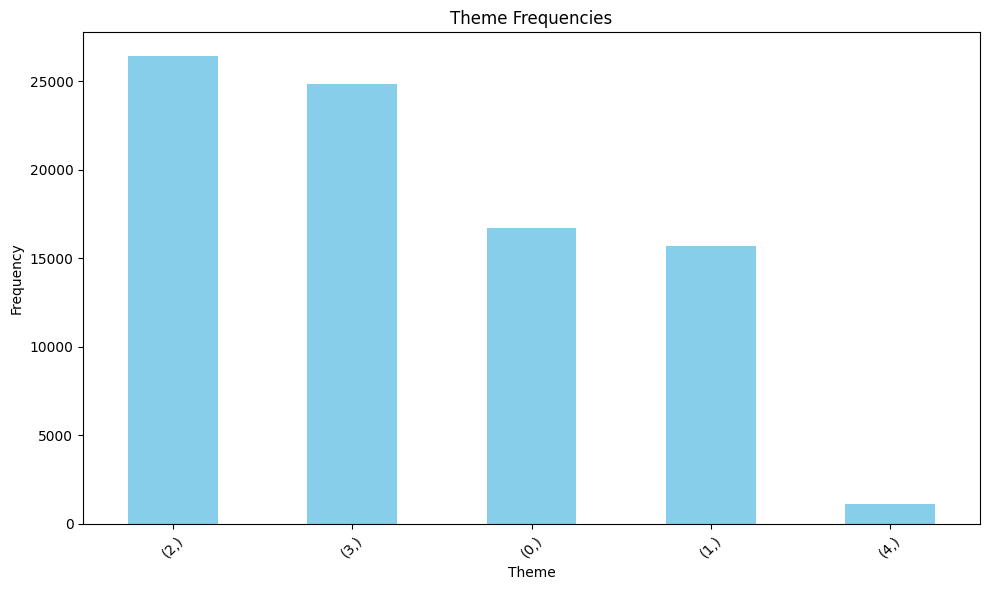

In [20]:
# Plot theme frequencies as a bar plot
plt.figure(figsize=(10, 6))
theme_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Theme')
plt.ylabel('Frequency')
plt.title('Theme Frequencies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

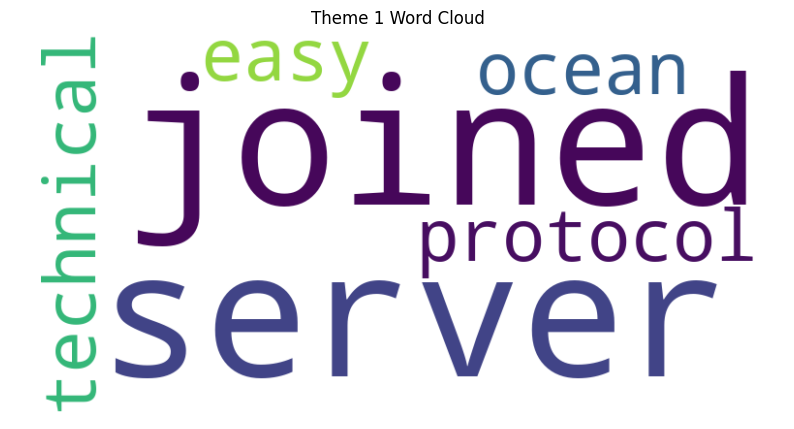

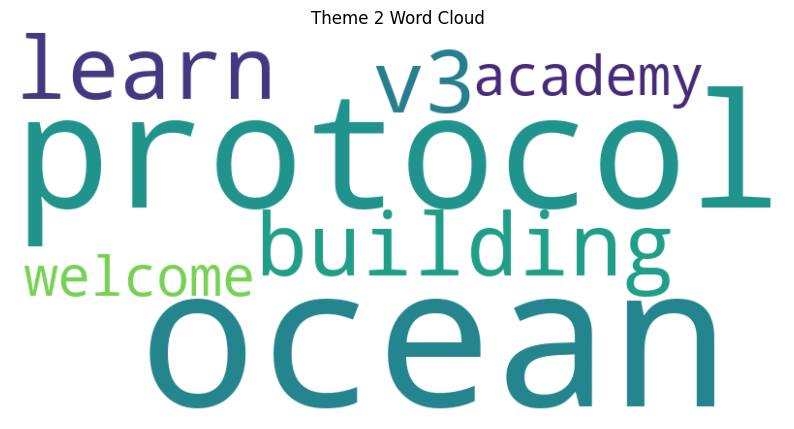

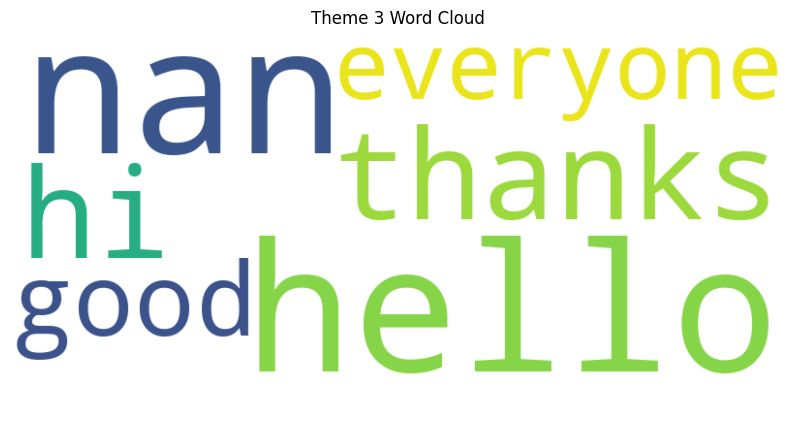

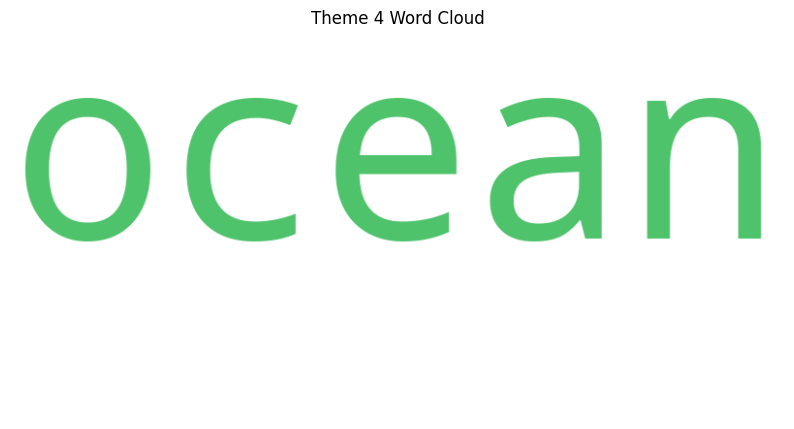

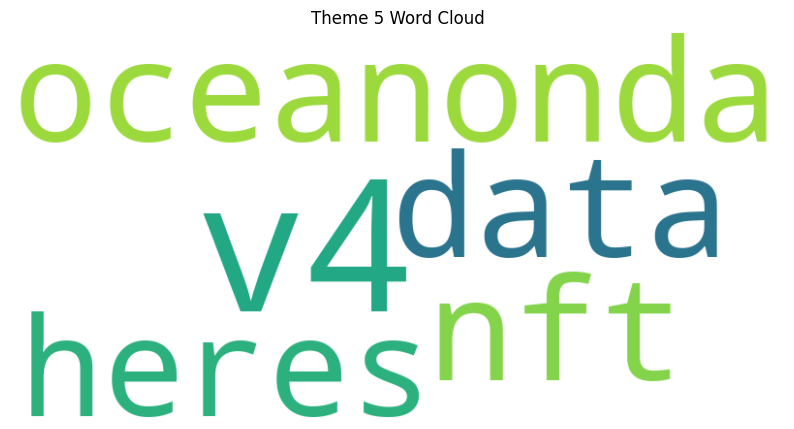

In [23]:
from wordcloud import WordCloud

# Assuming you have already extracted top words for each topic and stored them in a list called top_words_list

# Generate word clouds for each theme category
for idx, top_words in enumerate(top_words_list):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Theme {idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()
